In [465]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import json
# Always make it pretty.
plt.style.use('ggplot')
# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup
import datetime

In [2]:
file = pd.read_csv('data/Collisions.csv')

In [3]:
file[file['SPEEDING'] == 'Y'].shape[0]
#Number of Accidents with speeding involved

9492

In [4]:
file[(file['SPEEDING'] == 'Y') & (file['FATALITIES'] > 0)].shape[0]

85

In [5]:
file[file['FATALITIES'] > 0].shape[0]

328

In [6]:
print(file['INCDTTM'].isnull().sum())
file['UNDERINFL'].isnull().sum()


0


25721

In [7]:
file[(file['UNDERINFL'] == 'Y') | (file['UNDERINFL'] == '1' )].shape[0]

9315

In [8]:
file[file['SERIOUSINJURIES'] > 0].shape[0]
file['UNDERINFL'].unique()
drunkdracc = file[((file['UNDERINFL'] == 'Y') | (file['UNDERINFL'] == '1'))].shape[0]

In [9]:
infl = file[((file['UNDERINFL'] == 'Y') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['FATALITIES'] > 0))].shape[0]


underinflratio = infl / file[file['FATALITIES'] > 0 ].shape[0]

noninfl = file[((file['UNDERINFL'] == 'N') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['FATALITIES'] > 0))].shape[0]

noninfluratio = noninfl / file[file['FATALITIES'] > 0].shape[0]
#print(noninfluratio)
#print(underinflratio)
#print(file[(file['FATALITIES'] > 0) & (file['ADDRTYPE'] == 'Block')].shape[0])
#print(file[(file['FATALITIES'] > 0) & (file['ADDRTYPE'] == 'Intersection')].shape[0])
#print(file[(file['FATALITIES'] > 0) & (file['LIGHTCOND'] == 'Daylight')].shape[0])
print('drunk driving deaths / drunk driving accidents: ',(infl/drunkdracc))
nondrunkdrivingacccsdeath = file[((file['UNDERINFL'] == 'N') & (file['FATALITIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['FATALITIES'] > 0))].shape[0]
nondrunkdrivingacc = file[(file['UNDERINFL'] == 'N') | (file['UNDERINFL'] == '0')].shape[0]
print(nondrunkdrivingacc)
print('non drunk driving deaths / non drunk driving accidents: ',(nondrunkdrivingacccsdeath/nondrunkdrivingacc))
denominator = drunkdracc * nondrunkdrivingacc 
numerator = drunkdracc + nondrunkdrivingacc
shared_sample_freq = (nondrunkdrivingacccsdeath + infl) / denominator
shared_sample_variance = numerator * (shared_sample_freq * (1 - shared_sample_freq)) / denominator
difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))
difference_in_sample_proportions = (nondrunkdrivingacccsdeath/nondrunkdrivingacc)/(infl/drunkdracc)

p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print(p_value)

drunk driving deaths / drunk driving accidents:  0.00966183574879227
177568
non drunk driving deaths / non drunk driving accidents:  0.001267120201838169
0.0


In [10]:
seriousinjury = file[((file['UNDERINFL'] == 'Y') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['SERIOUSINJURIES'] > 0))].shape[0]
totalseriousinjury = file[file['SERIOUSINJURIES'] > 0].shape[0]
seriousinjurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['SERIOUSINJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['SERIOUSINJURIES'] > 0))].shape[0]
print(seriousinjury/totalseriousinjury)
print('serious injury driving accidents invoving drunk / drunk driving accidents: ',seriousinjury/drunkdracc)
print('serious injury driving accidents not involving drunk/ non drunk driving accidents: ',seriousinjurynondrunk/nondrunkdrivingacc)

0.14145516074450085
serious injury driving accidents invoving drunk / drunk driving accidents:  0.04487385936661299
serious injury driving accidents not involving drunk/ non drunk driving accidents:  0.014276220940710039


In [11]:
injury = file[((file['UNDERINFL'] == 'Y') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '1') & (file['INJURIES'] > 0))].shape[0]
injurynondrunk = file[((file['UNDERINFL'] == 'N') & (file['INJURIES'] > 0) )| ((file['UNDERINFL'] == '0') & (file['INJURIES'] > 0))].shape[0]
totalinjury = file[file['INJURIES'] > 0].shape[0]
print(injury/totalinjury)
print(injury/drunkdracc)
print(injurynondrunk/nondrunkdrivingacc)

0.06567435901758172
0.41825013419216317
0.3051563344746801


In [12]:
print('car accidents involving drunk driver that injury someone',injury)
print('car accidents involving non drunk driver that injury someone',injurynondrunk)
print('car accidents involving drunk driver',drunkdracc)
print('car accidents involving sober driver',nondrunkdrivingacc)
denominator = drunkdracc * nondrunkdrivingacc 
numerator = drunkdracc + nondrunkdrivingacc

car accidents involving drunk driver that injury someone 3896
car accidents involving non drunk driver that injury someone 54186
car accidents involving drunk driver 9315
car accidents involving sober driver 177568


In [13]:

#file['ST_COLCODE'] = pd.to_numeric(file[file.ST_COLCODE.notnull()])
file['ST_COLCODE'] = pd.to_numeric(file['ST_COLCODE'],errors = 'coerce')
print(file[(file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['FATALITIES'] > 0) & (file['ST_COLCODE'] >= 10)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['SERIOUSINJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['SERIOUSINJURIES'] > 0) & (file['ST_COLCODE'] >= 10)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['INJURIES'] > 0) & (file['ST_COLCODE'] >= 0) & (file['ST_COLCODE'] <= 5)].groupby('ST_COLCODE').count()['X'].sum())
print(file[(file['INJURIES'] > 0) & (file['ST_COLCODE'] >= 10)].groupby('ST_COLCODE').count()['X'].sum())

115
191
823
2050
6673
50121


In [15]:
latlong= file.iloc[0:101,0:2]
latlong['state'] = 'WA'
latlong
#trying to get all the zipcodes of data

,X,Y,state
0,-122.270834,47.539355,WA
1,-122.306332,47.606167,WA
2,-122.269611,47.516849,WA
3,-122.307505,47.612898,WA
4,-122.312430,47.708528,WA
5,-122.328079,47.604161,WA
6,-122.368598,47.670894,WA
7,-122.344507,47.687665,WA
8,-122.334266,47.733225,WA
9,-122.380504,47.672365,WA


In [87]:
file2 = file.copy()
#file2['INCDTTM'].str.contains('AM|PM',regex=True)
#test2 =file2['INCDTTM']
#test3 =test2[file2['INCDTTM'].str.contains('AM|PM',regex=True)]
#print(type(datetime.datetime.strptime('7/4/2019','%m/%d/%Y')))

In [42]:
for idx, my_date in enumerate(test2):
    try:
        file2.loc[idx,'INCDTTM'] = datetime.datetime.strptime(my_date,'%m/%d/%Y %I:%M:%S %p')
    except:
        file2.loc[idx,'INCDTTM'] = datetime.datetime.strptime(my_date,'%m/%d/%Y')

In [81]:
#file2.to_csv('data/CollionsWDatetime.csv',index=False)
file3 = pd.read_csv('data/CollionsWDatetime.csv')
#212604

In [82]:
#file3 = file3.dropna(subset=['INCDTTM'])
#file3.shape[0]
sum(file3['INCDTTM'].isnull())

0

In [64]:
file2.to_pickle('data/CollionsWDatetime.pkl.bz2', compression = 'bz2')

In [83]:
def datetimeconversion(row):
    try:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y %I:%M:%S %p')
    except:
        return datetime.datetime.strptime(row['INCDTTM'],'%m/%d/%Y')

In [91]:
file2['INCDTTM']=file2.apply(datetimeconversion, axis=1)


<class 'pandas._libs.tslib.Timestamp'>


In [425]:
file2[file2['INCDTTM'].dt.time != datetime.time(0,0)].shape[0]

160819

In [150]:
test3.min()

datetime.datetime(2004, 1, 10, 1, 27)

In [226]:
def getweather():
url = 'https://api.darksky.net/forecast/'
with open('data/dark_sky.txt', 'r') as file:
    key = file.read()
latlong = '/47.44472,-122.31361,'
for i in range(5683): #5682 is number of days from beg to end
    time = 1389346020 + (i*24*60*60)
    strtime = str(time)
    finalurl= url+key+latlong+strtime
    r = requests.get(finalurl)
    dic = json.loads(r.content)
    Weather.insert_one(dic)
 
    

In [292]:
Weather.find_one()

{'_id': ObjectId('5d781b8d4cadcc23e8d2595a'),
 'currently': {'apparentTemperature': 41.78,
  'cloudCover': 0.75,
  'dewPoint': 42.8,
  'humidity': 0.9,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1012.59,
  'summary': 'Mostly Cloudy',
  'temperature': 45.55,
  'time': 1389346020,
  'uvIndex': 0,
  'visibility': 10,
  'windBearing': 202,
  'windGust': 15.46,
  'windSpeed': 7.1},
 'daily': {'data': [{'apparentTemperatureHigh': 46.95,
    'apparentTemperatureHighTime': 1389394800,
    'apparentTemperatureLow': 39.39,
    'apparentTemperatureLowTime': 1389456000,
    'apparentTemperatureMax': 51.81,
    'apparentTemperatureMaxTime': 1389423600,
    'apparentTemperatureMin': 41.71,
    'apparentTemperatureMinTime': 1389348000,
    'cloudCover': 0.96,
    'dewPoint': 42.57,
    'humidity': 0.85,
    'icon': 'rain',
    'moonPhase': 0.35,
    'precipIntensity': 0.0048,
    'precipIntensityMax': 0.03,
    'precipIntensityMaxTime': 1389409200

In [237]:
datetime.datetime.utcfromtimestamp(1389340800)-datetime.timedelta(hours=8)

datetime.datetime(2014, 1, 10, 8, 0)

In [93]:
def getprecipitation(Weather):
    times = Weather.find({})
    info = dict()
    for time in times:
        for i in range(len(time['hourly']['data'])):
            t = time['hourly']['data'][i]['time']
            try: 
                rain = time['hourly']['data'][i]['precipIntensity']
            except:
                continue
            dt = datetime.datetime.utcfromtimestamp(t)-datetime.timedelta(hours=8)
            info[dt] = rain
    return info

In [99]:
rain = getprecipitation(Weather)
rainpd = pd.DataFrame.from_dict(rain, orient='index')


In [379]:
def thirtysixhoursofnorain(df,num):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] == 0:
            count += 1
        if df.iloc[i,0] != 0:
            if count >= num:
                lst.append(index)
            count = 0
    return lst
def getrainlist(df,num):
    count = 0
    lst = []
    for i, index in zip(range(df.size),df.index):
        if df.iloc[i,0] != 0:
            count += 1
            if count >= num:
                lst.append(index)
                count = 0
        if df.iloc[i,0] <= 0.01:
            count = 0
    return lst

In [206]:
thirtysixhourlst = thirtysixhoursofnorain(rainpd)
twentyfourhourdrylst = twentyfourhourdry(rainpd)

In [380]:
wetaccidentlst = getrainlist(rainpd,4)

In [390]:
print(len(wetaccidentlst))
print(len(thirtysixhourlst))

558
271


In [442]:
"""def getaccidentsdict(df,lst):
    diction = dict()    
    for i in lst:
        accidents = df[(df['INCDTTM'].dt.time != datetime.time(0,0)) &
                       (df['INCDTTM']>= i.to_pydatetime()) & 
                       (df['INCDTTM']< i.to_pydatetime() + datetime.timedelta(hours=1))].loc[:,'INCDTTM'].count()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
"""
def getaccidentsdict(df,lst):
    diction = dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = (
                       (df['INCDTTM']>= i.to_pydatetime()) & 
                       (df['INCDTTM']< i.to_pydatetime() + datetime.timedelta(hours=1))).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
    return diction
def getdrydrivingdict(df,lst):
    diction = dict()    
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = ((df['INCDTTM']< i.to_pydatetime() - datetime.timedelta(hours=2)) & 
                       (df['INCDTTM']>= i.to_pydatetime()- datetime.timedelta(hours=3))).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
    return diction
def getwetaccidentsdict(df,lst):
    diction = dict()
    df = df[df['INCDTTM'].dt.time != datetime.time(0,0)]
    for i in lst:
        accidents = ((df['INCDTTM']>= i.to_pydatetime()-datetime.timedelta(hours=1)) & 
                          (df['INCDTTM']< i.to_pydatetime())).sum()
        if accidents > 0:
            diction[i.to_pydatetime()] = accidents
    return diction

In [443]:
#wetaccidentdict = getwetaccidentsdict(file2,wetaccidentlst)

In [493]:
wetfourhours = sum(wetaccidentdict.values())
wetfourhoursvalues = wetaccidentdict.values()
wetfourhourskeys = wetaccidentdict.keys()
print(sum(wetaccidentdict.values()))
print(len(wetaccidentdict.values()))
print(np.mean(list(wetfourhoursvalues)))

1018
399
2.55137844612


In [391]:
def getaccidentsperhour(df):
    dic=dict()
    for i in range(24):
        if i == 23:
            hourly = df[(df['INCDTTM'].dt.time != datetime.time(0,0)) & (df['INCDTTM'].dt.time >= datetime.time(i,0)) &
           (df['INCDTTM'].dt.time <= datetime.time(23,59))].shape[0]
            dic[i]=hourly
        else:
            hourly = df[(df['INCDTTM'].dt.time != datetime.time(0,0)) & (df['INCDTTM'].dt.time >= datetime.time(i,0)) &
                        (df['INCDTTM'].dt.time < datetime.time(i+1,0))].shape[0]
            dic[i]=hourly
    return dic

In [392]:
hourlyaccidents = getaccidentsperhour(file2)

In [420]:
sum(list(hourlyaccidents.values()))

160819

In [448]:
#afterthirtysixhourdry = getaccidentsdict(file2,thirtysixhourlst)

162

In [449]:
#afterthirtysixhourrealdry = getdrydrivingdict(file2,thirtysixhourlst)
#aftrthirtysixhourtestdict = getdrydrivingdict(file2,thirtysixhourlst)

162

In [232]:
#afterseventytwohourwet = getaccidentsdict(file2,seventytwohourlist)
#aftersevnetytwohourdry = getdrydrivingdict(file2,seventytwohourlist)

In [455]:
wetthirtysix = sum(afterthirtysixhourdry.values())
wetthirtysixvalues = afterthirtysixhourdry.values()
wetthirtysixkeys = afterthirtysixhourdry.keys()
print(sum(afterthirtysixhourdry.values()))
print(len(afterthirtysixhourdry.values()))
print(np.mean(list(wetthirtysixvalues)))

424
185
2.29189189189


In [491]:
drythirtysix = sum(afterthirtysixhourrealdry.values())
drythirtysixvalues = afterthirtysixhourrealdry.values()
drthirtysixkeys = afterthirtysixhourrealdry.keys()
print(sum(afterthirtysixhourrealdry.values()))
print(len(afterthirtysixhourrealdry.values()))
print(np.mean(list(drythirtysixvalues)))

312
162
1.92592592593


In [249]:
#afteroneOsixhourwet = getaccidentsdict(file2,oneOsixhourlist)
#afteroneOsixhourdry = getdrydrivingdict(file2,oneOsixhourlist)
len(thirtysixhourlst)

271

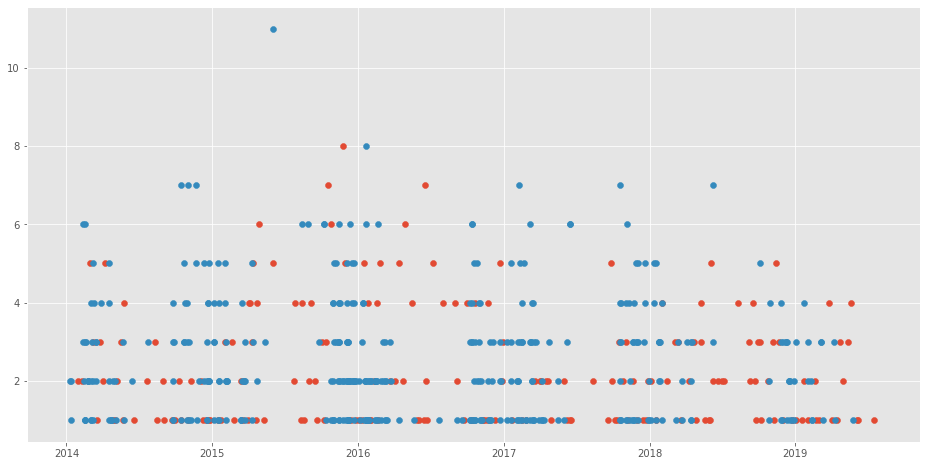

In [501]:
wetlst=[]
for i in list(wetthirtysixkeys):
    wetlst.append(i.time())

fig, ax = plt.subplots(1, figsize=(16, 8))
ax.scatter(list(wetthirtysixkeys),list(wetthirtysixvalues))
#ax.plot(list(drthirtysixkeys),list(drythirtysixvalues))
ax.scatter(list(wetfourhourskeys),list(wetfourhoursvalues))

In [479]:
type(file2['INCDTTM'].iloc[[0]])

pandas.core.series.Series

In [481]:
file2['INCDTTM'].loc[0].time() != datetime.time(0,0)

False

In [274]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [278]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [401]:
df = welch_satterhwaithe_df(list(drythirtysixvalues),list(wetthirtysixvalues))
test_stat = welch_test_statistic(list(drythirtysixvalues),list(wetthirtysixvalues))
test_stat

-2.5866054456401675

In [402]:
students = stats.t(df)
pvalue = students.cdf(test_stat)

In [403]:
pvalue

0.0050560875546973539

In [451]:
df2 = welch_satterhwaithe_df(list(wetfourhoursvalues),list(wetthirtysixvalues))
df2

375.5011124601217

In [452]:
test_stat2 = welch_test_statistic(list(wetthirtysixvalues),list(wetfourhoursvalues))
test_stat2

-1.9038258423703198

In [453]:
students2 = stats.t(df2)
pvalue2 = students2.cdf(test_stat2)

In [454]:
pvalue2

0.028848537834621747

In [408]:
df3 = welch_satterhwaithe_df(list(wetfourhoursvalues),list(drythirtysixvalues))
df3

417.75310822298695

In [409]:
test_stat3 = welch_test_statistic(list(wetfourhoursvalues),list(drythirtysixvalues))
test_stat3

5.2789465723661371

In [410]:
students3 = stats.t(df3)
pvalue3 = 1-students3.cdf(test_stat3)

In [411]:
pvalue3

1.0465991773234151e-07

In [95]:
from pymongo import MongoClient
import pprint

In [96]:
client = MongoClient('localhost', 27017)

In [97]:
db = client['WeatherDB']

In [98]:
Weather = db['Weather']

In [194]:
testcoll = db['testcoll']
PrecpIntAndProbHourly = db['PrecpIntAndProbHourly']

(1, 2)